In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.linear_model import LinearRegression
from math import sqrt

import wrangle as w

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = w.wrangle_zillow()
df.head()

,bedrooms,bathrooms,sq_ft,fips,year_built,tax_amount,tax_value
0,4.0,2.0,3633.0,6037.0,2005.0,6941.39,296425.0
1,3.0,4.0,1620.0,6037.0,2011.0,10244.94,847770.0
2,3.0,2.0,2077.0,6037.0,1926.0,7924.68,646760.0
3,3.0,1.0,1244.0,6037.0,1950.0,2532.88,169471.0
4,3.0,2.0,1300.0,6037.0,1950.0,3110.99,233266.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2079451.0,3.277011,0.879244,1.00,3.00,3.0,4.000,6.00
bathrooms,2079451.0,2.186984,0.871963,1.00,2.00,2.0,3.000,6.00
sq_ft,2079451.0,1798.989806,783.878927,1.00,1252.00,1609.0,2161.000,9880.00
fips,2079451.0,6048.298681,20.364186,6037.00,6037.00,6037.0,6059.000,6111.00
year_built,2079451.0,1960.622959,21.844072,1801.00,1949.00,1958.0,1975.000,2016.00
tax_amount,2079451.0,4918.528934,3638.783252,16.48,2518.33,4045.5,6215.515,100379.34
tax_value,2079451.0,399342.888356,313500.608467,22.00,187135.00,322628.0,517000.000,1999995.00


In [4]:
train, validate, test = w.train_val_test(df, stratify = 'tax_value')
train.shape, validate.shape, test.shape

((1455615, 7), (727807, 7), (727808, 7))

In [6]:
mms = MinMaxScaler()

train['sq_ft'] = mms.fit_transform(train[['sq_ft']])

In [23]:
baseline = round(train['tax_value'].mean(), 2)
baseline

399191.6

In [9]:
preds = train[['sq_ft', 'tax_value']]

In [24]:
preds['baseline'] = baseline
preds.head()

,sq_ft,tax_value,yhat,residuals,baseline
553891,0.320984,318856.0,721660.687491,402804.687491,399191.6
863544,0.198704,279877.0,438029.322610,158152.322610,399191.6
682472,0.142018,92106.0,306544.583923,214438.583923,399191.6
865965,0.184735,111459.0,405627.726291,294168.726291,399191.6
718183,0.125822,164846.0,268977.515727,104131.515727,399191.6


## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [7]:
ols_model = LinearRegression()

ols_model.fit(train[['sq_ft']], train[['tax_value']])

LinearRegression()

In [10]:
preds['yhat'] = ols_model.predict(train[['sq_ft']])
preds.head()

,sq_ft,tax_value,yhat
553891,0.320984,318856.0,721660.687491
863544,0.198704,279877.0,438029.322610
682472,0.142018,92106.0,306544.583923
865965,0.184735,111459.0,405627.726291
718183,0.125822,164846.0,268977.515727


## 3. Plot the residuals for the linear regression model that you made.



In [11]:
preds['residuals'] = preds['yhat'] - preds['tax_value']
preds.head()

,sq_ft,tax_value,yhat,residuals
553891,0.320984,318856.0,721660.687491,402804.687491
863544,0.198704,279877.0,438029.322610,158152.322610
682472,0.142018,92106.0,306544.583923,214438.583923
865965,0.184735,111459.0,405627.726291,294168.726291
718183,0.125822,164846.0,268977.515727,104131.515727


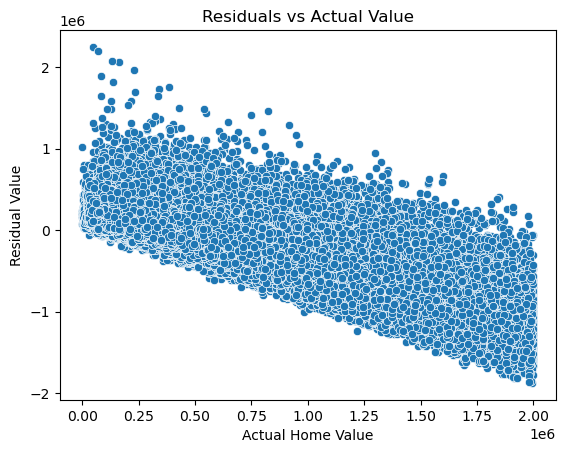

In [14]:
sns.scatterplot(x='tax_value', y='residuals', data=preds)
plt.xlabel('Actual Home Value')
plt.ylabel('Residual Value')
plt.title('Residuals vs Actual Value')
plt.show()

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

## 5.Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model


In [15]:
sse = (preds.residuals **2).sum()
sse

9.359294805506536e+16

In [16]:
ess = ((preds.yhat - preds.tax_value.mean())**2).sum()
ess

4.930065107360015e+16

In [17]:
tss = ess + sse
tss

1.428935991286655e+17

In [18]:
mse = mean_squared_error(preds.tax_value, preds.yhat)
mse

64297872758.29485

In [38]:
rmse = sqrt(mse)
rmse

253570.25211624263

In [25]:
mse_baseline = mean_squared_error(preds.tax_value, preds.baseline)
mse_baseline

98167165856.76471

In [27]:
preds['mse_baseline'] = mse_baseline
preds

,sq_ft,tax_value,yhat,residuals,baseline,mse_baseline
553891,0.320984,318856.0,7.216607e+05,402804.687491,399191.6,9.816717e+10
863544,0.198704,279877.0,4.380293e+05,158152.322610,399191.6,9.816717e+10
682472,0.142018,92106.0,3.065446e+05,214438.583923,399191.6,9.816717e+10
865965,0.184735,111459.0,4.056277e+05,294168.726291,399191.6,9.816717e+10
718183,0.125822,164846.0,2.689775e+05,104131.515727,399191.6,9.816717e+10
...,...,...,...,...,...,...
549220,0.150319,189635.0,3.257977e+05,136162.706374,399191.6,9.816717e+10
162752,0.329790,1345806.0,7.420878e+05,-603718.219178,399191.6,9.816717e+10
1012524,0.157506,231164.0,3.424681e+05,111304.092886,399191.6,9.816717e+10
1300612,0.267132,421439.0,5.967502e+05,175311.185739,399191.6,9.816717e+10


In [28]:
sse_baseline = mse_baseline * len(preds)
sse_baseline

1.4289359912859456e+17

In [29]:
preds['sse_baseline'] = sse_baseline

In [30]:
rmse_baseline = mse_baseline**.5
rmse_baseline

313316.3989592066

In [31]:
preds['rmse_baseline'] = rmse_baseline

In [32]:
preds.head()

,sq_ft,tax_value,yhat,residuals,baseline,mse_baseline,sse_baseline,rmse_baseline
553891,0.320984,318856.0,721660.687491,402804.687491,399191.6,9.816717e+10,1.428936e+17,313316.398959
863544,0.198704,279877.0,438029.322610,158152.322610,399191.6,9.816717e+10,1.428936e+17,313316.398959
682472,0.142018,92106.0,306544.583923,214438.583923,399191.6,9.816717e+10,1.428936e+17,313316.398959
865965,0.184735,111459.0,405627.726291,294168.726291,399191.6,9.816717e+10,1.428936e+17,313316.398959
718183,0.125822,164846.0,268977.515727,104131.515727,399191.6,9.816717e+10,1.428936e+17,313316.398959


In [15]:
preds['baseline_res_squared'] = preds['baseline_res'] ** 2
preds['yhat_res_sqaured'] = preds['yhat_res'] ** 2
preds.head()

,sq_ft,tax_value,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_sqaured
553891,0.320984,318856.0,399191.6,721660.687491,80335.6,402804.687491,6.453809e+09,1.622516e+11
863544,0.198704,279877.0,399191.6,438029.322610,119314.6,158152.322610,1.423597e+10,2.501216e+10
682472,0.142018,92106.0,399191.6,306544.583923,307085.6,214438.583923,9.430157e+10,4.598391e+10
865965,0.184735,111459.0,399191.6,405627.726291,287732.6,294168.726291,8.279005e+10,8.653524e+10
718183,0.125822,164846.0,399191.6,268977.515727,234345.6,104131.515727,5.491786e+10,1.084337e+10


In [16]:
sse_baseline = preds['baseline_res_squared'].sum()
sse_yhat = preds['yhat_res_sqaured'].sum()
sse_baseline, sse_yhat

(1.4289359912859456e+17, 9.359294805506536e+16)

In [19]:
mean_squared_error(preds['tax_value'], preds['yhat'])

64297872758.29485

In [20]:
mean_squared_error(preds['tax_value'], preds['yhat'], squared = False)

253570.25211624263

In [19]:
preds['yhat_mean_res'] = preds['yhat'] - preds['baseline_preds']
preds['yhat_mean_res_squared'] = preds['yhat_mean_res'] ** 2

ess_baseline = 0
ess_yhat = preds['yhat_mean_res_squared'].sum()
ess_yhat

4.930065107360021e+16

In [20]:
preds.head()

,sq_ft,tax_value,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_sqaured,yhat_mean_res,yhat_mean_res_squared
553891,0.320984,318856.0,399191.6,721660.687491,80335.6,402804.687491,6.453809e+09,1.622516e+11,322469.087491,1.039863e+11
863544,0.198704,279877.0,399191.6,438029.322610,119314.6,158152.322610,1.423597e+10,2.501216e+10,38837.722610,1.508369e+09
682472,0.142018,92106.0,399191.6,306544.583923,307085.6,214438.583923,9.430157e+10,4.598391e+10,-92647.016077,8.583470e+09
865965,0.184735,111459.0,399191.6,405627.726291,287732.6,294168.726291,8.279005e+10,8.653524e+10,6436.126291,4.142372e+07
718183,0.125822,164846.0,399191.6,268977.515727,234345.6,104131.515727,5.491786e+10,1.084337e+10,-130214.084273,1.695571e+10


In [21]:
tss_baseline = sse_baseline + ess_baseline
tss_yhat = sse_yhat + ess_yhat
tss_baseline, tss_yhat

(1.4289359912859456e+17, 1.4289359912866557e+17)

In [22]:
ess_baseline / tss_baseline

0.0

In [ ]:
mse_baseline = sse_baseline/len(preds)
mse_yhat = sse_yhat/len(preds)
mse_baseline, mse_yhat

In [24]:
rmse_baseline = sqrt(mse_baseline)
rmse_yhat = sqrt(mse_yhat)
rmse_baseline, rmse_yhat

(313316.3989592066, 253570.25211624263)

## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [34]:
if sse < sse_baseline:
    print('My OSL model performs better than baseline')
else:
    print('My OSL model performs worse than baseline.')

My OSL model performs better than baseline


## 7. What is the amount of variance explained in your model?

In [35]:
r2 = ess / tss
r2

0.3450165114058638

In [58]:
r2 = ess_yhat/tss_yhat
r2

0.34501651140586403

In [36]:
explained_variance_score(preds['tax_value'],preds['yhat'])

0.34501651140553846

## 8. Is your model better than the baseline model?

In [39]:
rmse_baseline - rmse


59746.146842963964

In [40]:
if rmse < rmse_baseline:
    print(f'The model rmse performs better the rmse_baseline')
else:
    print(f'The model rmse performs worse than the rmse_baseline')

The model rmse performs better the rmse_baseline


## 9. Create a file named evaluate.py that contains the following functions.

 - plot_residuals(y, yhat): creates a residual plot
 
 
 - regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)


 - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
 
 
 - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [43]:
def plot_residual(y, yhat):
    
    residuals = y - yhat
    
    plt.scatter(x = y, y = residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    
    return plt.show()

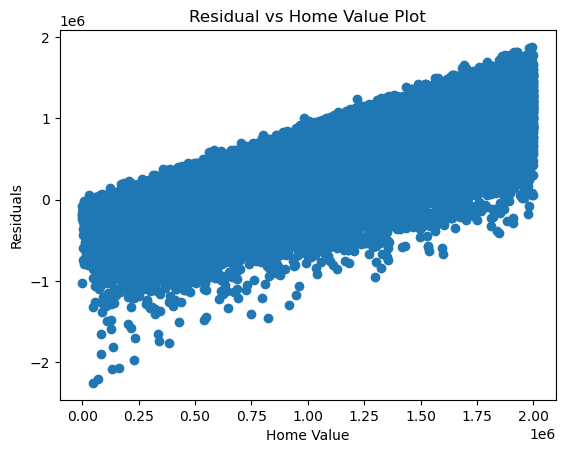

In [45]:
plot_residual(preds['tax_value'], preds['yhat'])

In [56]:
def regression_errors(y, yhat):
    
    mse = mean_squared_error(y, yhat)
    sse = mse * len(y)
    rmse = mse **.5
    
    ess = ((yhat - y.mean()) **2).sum()
    tss = ess + sse
    
    return print(f'''
    mse: {mse:.2f}
    sse: {sse:.2f}
    rmse: {rmse:.2f}
    ess: {ess:.2f}
    tss: {tss:.2f}
    ''')

In [57]:
regression_errors(preds.tax_value, preds.yhat)


    mse: 64297872758.29
    sse: 93592948055065360.00
    rmse: 253570.25
    ess: 49300651073600152.00
    tss: 142893599128665504.00
    


In [61]:
def baseline_mean_errors(y):
    
    baseline = np.repeat(y.mean(), len(y))
    
    mse = mean_squared_error(y, baseline)
    sse = mse * len(y)
    rmse= sqrt(mse)
    
    return print(f'''
    mse: {mse:.2f}
    sse: {sse:.2f}
    rmse: {rmse:.2f}
    ''')

In [62]:
baseline_mean_errors(preds['tax_value'])


    mse: 98167165856.76
    sse: 142893599128594544.00
    rmse: 313316.40
    


In [75]:
def better_than_baseline(y, yhat):
    
    sse, ess, tss, mse, rmse = regression_errors(y, yhat)
    
    sse_baseline, mse_baseline, rmse_baseline = baseline_mean_errors(y)
    
    return
    if sse < sse_baseline:
        print('My OSL model performs better than baseline')
    else:
        print('My OSL model performs worse than baseline')

In [ ]:
better_than_baseline(preds['tax_value'], preds['yhat'])